In [48]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [49]:
import warnings
warnings.filterwarnings(action='ignore')

# A Toy Case

Let's explore clustering models on an artificial data set with five features.

In [50]:
data1 = pd.read_csv('data/hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,2.090884,7.405251,2.450357,3.191506,2.426240
2,2.498841,7.292161,2.468256,2.975176,2.710137
3,2.009998,7.408158,2.486901,2.863235,2.561799
4,2.236813,7.245803,2.181933,2.825106,2.599706


#### a) First, guess the number of clusters we could have. 

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. 

#### c) Visualize the clustering result and color the points according to the labels obtained in part b). 

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? 

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). 

In [51]:
# a) Take four as an initial guess. 

In [52]:
km=KMeans(random_state=2498,n_clusters=4).fit(data1)
labels = km.labels_
print(labels)
# b) Here are the labels

[3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(-4.176439537070557, 11.465584291480347, -8.592117834240307, 4.403627681881299)

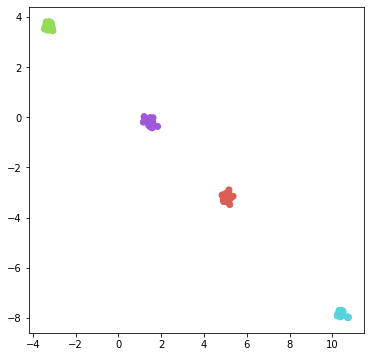

In [53]:
from sklearn.manifold import TSNE
import seaborn as sns

Trans_X = TSNE(random_state=2498).fit_transform(data1)

palette = np.array(sns.color_palette("hls", 4))
f = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(Trans_X[:,0], Trans_X[:,1], c=palette[labels])
ax.axis('tight')
# c) After Dimensionality Reduction Visualizing the Clusters

In [54]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=2498)
    cluster_labels = km.fit_predict(data1)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5682645480262756
For n_clusters =3, the average silhouette_score is :0.7215646185743501
For n_clusters =4, the average silhouette_score is :0.8328946022248808
For n_clusters =5, the average silhouette_score is :0.76017972347716
For n_clusters =6, the average silhouette_score is :0.6048409886474883


In [55]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

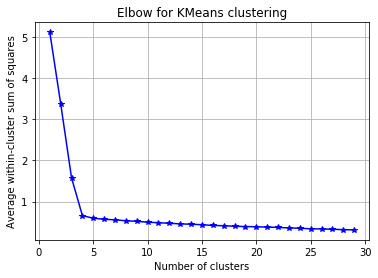

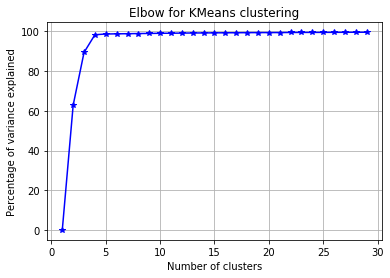

In [56]:
elbow(data1, range(1,30))

In [57]:
# d) Apparently 4 is the optimal number for K. The result is consistent for 4 has the highest average silhouette_score
# and in the meanwhile 5 doesn't contribute much information in the Elbow method. So 4 is optimal.

In [58]:
from sklearn.mixture import GaussianMixture 
gm=GaussianMixture(n_components=4,random_state=2498).fit(data1)

In [59]:
gm_labels = gm.predict(data1)
gm_labels

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

(-4.176439537070557, 11.465584291480347, -8.592117834240307, 4.403627681881299)

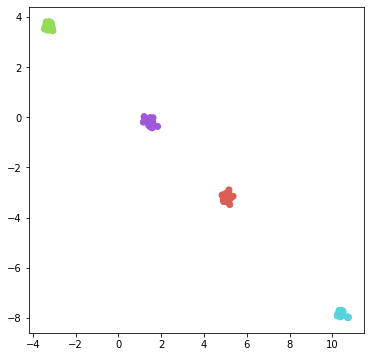

In [60]:
Trans_gm_X = TSNE(random_state=2498).fit_transform(data1)

palette = np.array(sns.color_palette("hls", 4))
f = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(Trans_X[:,0], Trans_X[:,1], c=palette[gm_labels])
ax.axis('tight')

In [61]:
# e) Gaussian Mixture model for the data. The result is basically the same.

# A Real Case: Collision Data in NYC 

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are over 600 unique records in the file, but you want to determine the exact number. Try k-means with 600-680 clusters applying Elbow method and analyzing Silhouette scores.

In [62]:
data2 = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head(50)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,
5,10/31/2017,0:00,QUEENS,11363,40.7707,-73.7374,"(40.770733, -73.737404)",LITTLE NECK PARKWAY,43 AVENUE,,...,Unspecified,,,,3780961,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
6,10/31/2017,0:00,QUEENS,11377,,,,Northern Blvd,53 place,,...,,,,,3780655,PASSENGER VEHICLE,,,,
7,10/31/2017,0:00,BRONX,10451,40.8251,-73.9254,"(40.825115, -73.92541)",WALTON AVENUE,EAST 157 STREET,,...,Unspecified,,,,3781080,PASSENGER VEHICLE,PICK-UP TRUCK,,,
8,10/31/2017,0:00,BROOKLYN,11217,40.6857,-73.9857,"(40.685658, -73.985695)",DEAN STREET,BOND STREET,,...,Unspecified,,,,3782240,PASSENGER VEHICLE,PASSENGER VEHICLE,,,
9,10/31/2017,0:00,BROOKLYN,11211,40.7161,-73.936,"(40.71612, -73.936035)",,,350 MORGAN AVENUE,...,,,,,3780902,DS,PASSENGER VEHICLE,,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results. ) Briefly explain your approach. 


#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  

In [63]:
df = data2.drop(['DATE', 'LOCATION'],axis=1) #drop DATE beacause they are all the same; drop the LOCATION because it's duplicated.

In [64]:
# Find all non-numeric columns
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Categorical = []
for i in df.columns:
    if data2[i].dtypes not in numeric_dtypes:   
        Categorical.append(i)

In [65]:
# Factorize all categorical cols
for col in df[Categorical]:
    label, unique = pd.factorize(df[col])
    df[col] = label

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (618). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (619). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (620). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (621). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\A

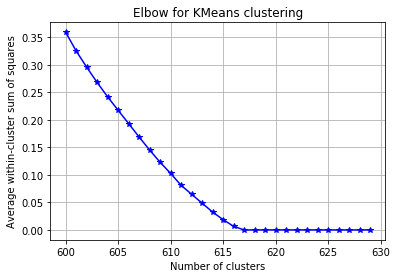

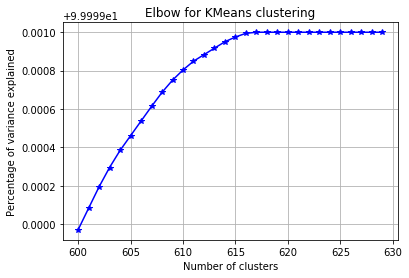

In [66]:
# Elbow does a great job which tells us the cluster number should be 617, implying there are 63 duplicated row in dataset.
elbow(df, range(600,630))

In [67]:
# Silhouette score reduces gradually, partly because cluster number is close to the number of records, which leads to less ideal results.
# But we can still figure out that after 617, the score never changes, which indicates no more information added.
# So the cluster number should be 617.
range_n_clusters = range(600,630)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=2498)
    cluster_labels = km.fit_predict(df)
    #report average Silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =600, the average silhouette_score is :0.21314268523628485
For n_clusters =601, the average silhouette_score is :0.21229531419808748
For n_clusters =602, the average silhouette_score is :0.21145120503456413
For n_clusters =603, the average silhouette_score is :0.2109691431204518
For n_clusters =604, the average silhouette_score is :0.2086880129259234
For n_clusters =605, the average silhouette_score is :0.20649189273430363
For n_clusters =606, the average silhouette_score is :0.2050468467239405
For n_clusters =607, the average silhouette_score is :0.20392030611570783
For n_clusters =608, the average silhouette_score is :0.2020290655312852
For n_clusters =609, the average silhouette_score is :0.20077432139180806
For n_clusters =610, the average silhouette_score is :0.19836689253353232
For n_clusters =611, the average silhouette_score is :0.19840964697008312
For n_clusters =612, the average silhouette_score is :0.1964262669354898
For n_clusters =613, the average silhouette

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (618). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =618, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (619). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =619, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (620). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =620, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (621). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =621, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (622). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =622, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (623). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =623, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (624). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =624, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (625). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =625, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (626). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =626, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (627). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =627, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (628). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =628, the average silhouette_score is :0.18529411764705883
For n_clusters =629, the average silhouette_score is :0.18529411764705883


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (629). Possibly due to duplicate points in X.
  return_n_iter=True)


In [68]:
# a) Through two methods above, The unique row number should be 617 

In [69]:
df2 = data2.loc[data2.duplicated() == True] 
len(df2),len(data2)
# b) Use Duplicated to extract the duplicated row, which turns out 63 rows are duplicated out of 680 rows.
# As we can see, the clustering technique did a perfect job.

(63, 680)

# Another Real world Case: 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [70]:
#load the data
data1=pd.read_csv("data/stop_2012.csv", index_col='zipcode')
data1.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [71]:
#considering only the in-day timeline 
data1=data1.iloc[:,-6:]
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


#### a) Find and visualize 5 zip codes with most stops

#### b) Filter the data to have at least 30 stop&frisk observations per zip code

#### c) We want to cluster the zip codes by the stops timeline data set. Choose the number of clusters k for Kmeans. Try both - Elbow method and Silhouette score - for that. In case the results are inconsistent provide reasoning for your choice of k. 

#### d) Visualize the k-means clustering for the k you've chosen

#### e) Repeat d) using Guassian Mixture model

In [72]:
data3 = data1.copy()
data3['Total'] = data3['time_1'] + data3['time_2'] + data3['time_3'] + data3['time_4'] + data3['time_5'] + data3['time_6']
data3 = data3.sort_values(by='Total', ascending=False)
df3 = data3.head().copy()
df3 

# a) Top 5 zip codes with most stops

,time_1,time_2,time_3,time_4,time_5,time_6,Total
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


In [73]:
import geopandas as gpd
NYCzip=gpd.read_file('data/NY.shp')

In [74]:
top = {i:df3.Total[i] for i in df3.index}
NYCzip['top_total'] = 0
for zipcode in NYCzip['zipcode']:
    if zipcode in top:
        NYCzip['top_total'].loc[NYCzip['zipcode'] == zipcode] = top[zipcode]

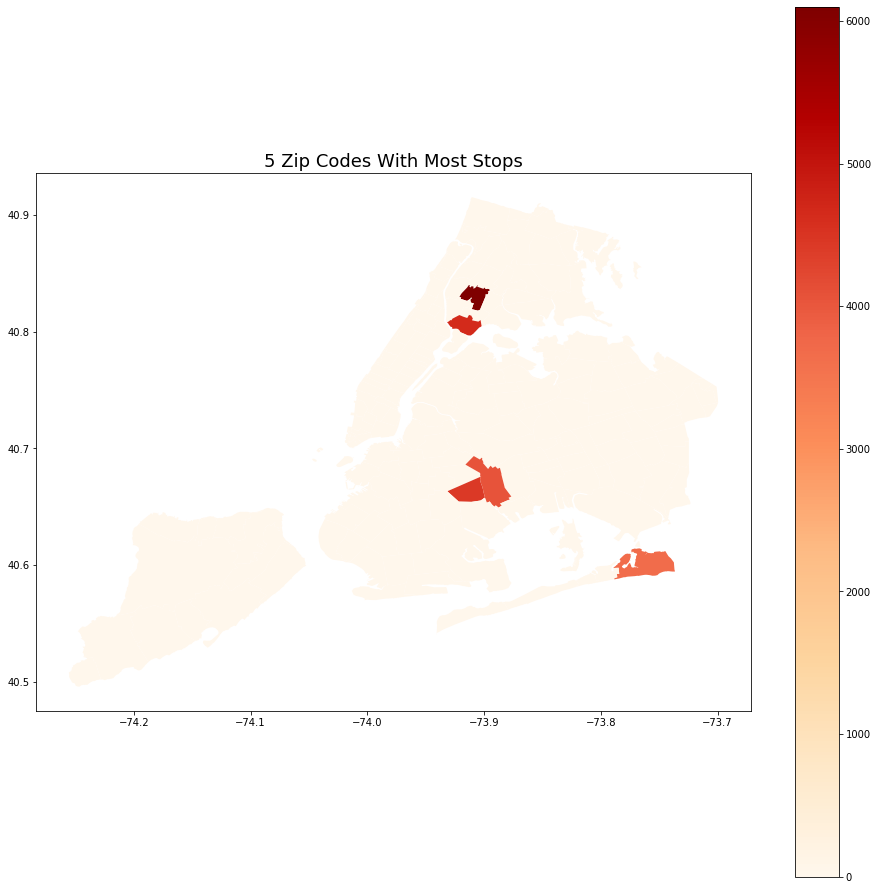

In [75]:
f, ax = plt.subplots(1, figsize=(16,16))
ax.set_title('5 Zip Codes With Most Stops', fontsize=18)
NYCzip.plot(ax=ax, column='top_total', legend=True, cmap='OrRd')
# Visualize top 5 zip codes with most stops

In [76]:
data3 = data3.loc[data3['Total'] >= 30]
data3.tail()
# b) At least 30 stop&frisk observations per zip code

,time_1,time_2,time_3,time_4,time_5,time_6,Total
zipcode,,,,,,,
10306,16.0,3.0,2.0,1.0,5.0,6.0,33.0
11358,5.0,0.0,0.0,1.0,21.0,6.0,33.0
11104,2.0,1.0,4.0,11.0,9.0,5.0,32.0
10021,0.0,2.0,6.0,17.0,6.0,1.0,32.0
11379,1.0,1.0,3.0,6.0,10.0,11.0,32.0


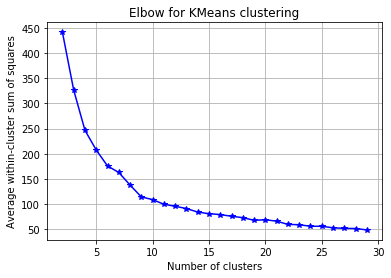

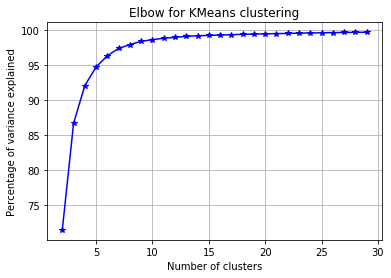

In [77]:
elbow(data3, range(2,30))

In [78]:
range_n_clusters = range(2,30)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=2498)
    cluster_labels = km.fit_predict(data3)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data3, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.7475283055759285
For n_clusters =3, the average silhouette_score is :0.7169799142640743
For n_clusters =4, the average silhouette_score is :0.6866186499829767
For n_clusters =5, the average silhouette_score is :0.6653401307193373
For n_clusters =6, the average silhouette_score is :0.6498848020711087
For n_clusters =7, the average silhouette_score is :0.6501971936570412
For n_clusters =8, the average silhouette_score is :0.5473342082933489
For n_clusters =9, the average silhouette_score is :0.5430963474287375
For n_clusters =10, the average silhouette_score is :0.537104576551071
For n_clusters =11, the average silhouette_score is :0.5376432894640877
For n_clusters =12, the average silhouette_score is :0.5285122718098054
For n_clusters =13, the average silhouette_score is :0.526247156540186
For n_clusters =14, the average silhouette_score is :0.45661169228791176
For n_clusters =15, the average silhouette_score is :0.44612294793953516


In [79]:
# c) I would like to pick 5 or 23, for 5 is because after 5 in Elbow the slope reduce dramatically,
#                                                   indicating not much information is added thereafter.
# As for 23, it is because 23 has the comparatively larger average silhouette_score and slope barely changes after 23.
# I would personally pick 5 for there are only 155 records in the dataset, 23 seems a bit too much.

In [80]:
len(data3)

155

(-17.243029572032256,
 12.271175362132354,
 -5.501075208336224,
 11.774044931084026)

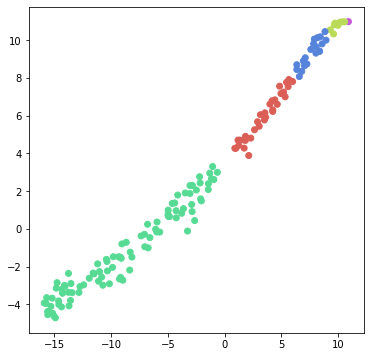

In [81]:
km=KMeans(random_state=2498,n_clusters=5).fit(data3)
labels = km.labels_

Trans_X = TSNE(random_state=2498).fit_transform(data3)

palette = np.array(sns.color_palette("hls", 5))
f = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(Trans_X[:,0], Trans_X[:,1], c=palette[labels])
ax.axis('tight')

In [82]:
# d) As can be seen from the graph, I don't think it's a pretty good match, nor is 23. 
# I would pick 2 from my naked eye, but K-means can't have good matches even if I use 2 clusters.

(-17.243029572032256,
 12.271175362132354,
 -5.501075208336224,
 11.774044931084026)

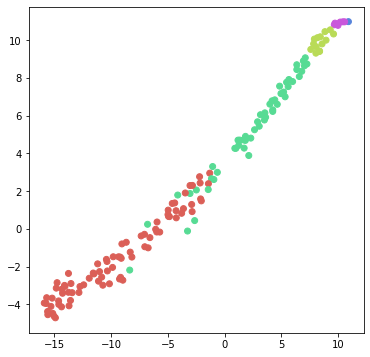

In [83]:
from sklearn.mixture import GaussianMixture 
gm=GaussianMixture(n_components=5,random_state=2498).fit(data3)
gm_labels = gm.predict(data3)
Trans_gm_X = TSNE(random_state=2498).fit_transform(data3)
palette = np.array(sns.color_palette("hls", 5))
f = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(Trans_X[:,0], Trans_X[:,1], c=palette[gm_labels])
ax.axis('tight')

In [84]:
# e) Repeat Visualization using Guassian Mixture model. The result is still not ideal, nor is 2 or 23. Because Gaussian 
# Mixture is best used when there is corelation in dataset, which apprently is not the situation. So we should try DBSCAN  


(-17.243029572032256,
 12.271175362132354,
 -5.501075208336224,
 11.774044931084026)

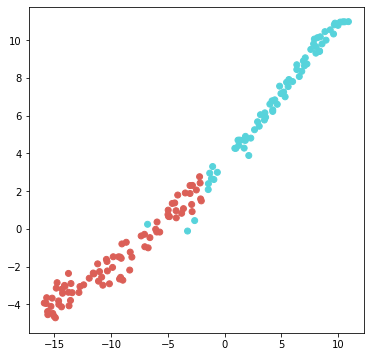

In [136]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=45, min_samples=2).fit(data3)
db_labels = dbscan.fit_predict(data3)
Trans_db_X = TSNE(random_state=2498).fit_transform(data3)
palette = np.array(sns.color_palette("hls",2))
f = plt.figure(figsize=(6, 6))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(Trans_X[:,0], Trans_X[:,1], c=palette[db_labels])
ax.axis('tight')

In [ ]:
# Apparently DBSCAN model result is more convincing.